# **ANNOTATIONS VS PREDICTIONS**

# **Section 01.** Necessary Setup and Imports

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.chdir(r'/content/drive/MyDrive/TIC-YOLO')

In [4]:
import os
import requests
import zipfile
import cv2
import matplotlib.pyplot as plt
import glob
import numpy as np
import random
from tqdm.auto import tqdm
import pandas as pd

# **Section 02.** Filtered Annotations

### **Section 02.01.** General Table (Annotations)

In [8]:
# Define the path of filtered annotations (This was done in script "02_Filtered_Annotations.ipynb")
label_path = '/content/drive/MyDrive/TIC-YOLO/Annotations_vs_Predictions/Filtered_Annotations'

# List all files stored in "Filtered_Annotations" folder
label_files = glob.glob(label_path+ '/*')
label_files.sort()

# Declare a dictionary (to count the number of vehicles in each class)
class_counts = {0: 0, 1: 0, 2: 0, 3: 0}


# Iterate through all the files stored in "Filtered Annotations" folder
for label_file in label_files:
    with open(label_file, 'r') as f:
        label_lines = f.readlines()
        for label_line in label_lines:
            label_line = label_line.strip()
            if not label_line:
                continue
            label, x_c, y_c, w, h = label_line.split(' ')
            label = int(float(label))
            if label in class_counts:
                class_counts[label] += 1

# Convert the distionary into a data frame
df_filtered_annotations = pd.DataFrame(list(class_counts.items()), columns=['Class', 'Count'])

# Show the table created
print('%%% Counting Table %%%')
print(df_filtered_annotations)

print(f'Total number of detected vehicle: {sum(df_filtered_annotations["Count"])}')

%%% Counting Table %%%
   Class  Count
0      0   5404
1      1   1374
2      2    340
3      3     28
Total number of detected vehicle: 7146


In [6]:
# Count depending of the set (Train, test, or val)
# Define the path of filtered annotations (This was done in script "02_Filtered_Annotations.ipynb")
label_path = '/content/drive/MyDrive/TIC-YOLO/Annotations_vs_Predictions/Filtered_Annotations'

# List all files stored in "Filtered_Annotations" folder
label_files = glob.glob(label_path+ '/*')
label_files.sort()
label_files = [all_labels_k for all_labels_k in label_files if all_labels_k.split(os.path.sep)[-1][:10] != "filtered_6" and all_labels_k.split(os.path.sep)[-1][:10] != "filtered_7" ]

# Declare a dictionary (to count the number of vehicles in each class)
class_counts = {0: 0, 1: 0, 2: 0, 3: 0}


# Iterate through all the files stored in "Filtered Annotations" folder
for label_file in label_files:
    with open(label_file, 'r') as f:
        label_lines = f.readlines()
        for label_line in label_lines:
            label_line = label_line.strip()
            if not label_line:
                continue
            label, x_c, y_c, w, h = label_line.split(' ')
            label = int(float(label))
            if label in class_counts:
                class_counts[label] += 1

# Convert the distionary into a data frame
df_filtered_annotations = pd.DataFrame(list(class_counts.items()), columns=['Class', 'Count'])

# Show the table created
print('%%% Counting Table %%%')
print(df_filtered_annotations)

print(f'Total number of detected vehicle: {sum(df_filtered_annotations["Count"])}')

%%% Counting Table %%%
   Class  Count
0      0   4051
1      1   1016
2      2    322
3      3     28
Total number of detected vehicle: 5417


### **Section 02.02.** Detailed Table (Annotations)

In [9]:
counts = np.array([], dtype=int)
aux = 0

for label_file in label_files:
    with open(label_file, 'r') as f:
        line_count = len(f.readlines())
        counts = np.append(counts, line_count)
    aux += 1
    if(aux == 11):
      max_hour = np.max(counts[-11:])
      mean_hour = np.mean(counts[-11:])
      counts = np.append(counts, [max_hour, mean_hour])
      aux = 0

matrix_counts = counts.reshape((105, 13))

col_names = [f"img{i}" for i in range(1,12)]
col_names.append("Max_count")
col_names.append("Mean_count")

detailed_table_annotations = pd.DataFrame(matrix_counts, columns=col_names)

days = [f"Day {i}" for i in range(1,8) for j in range(1,16)]
detailed_table_annotations['Day'] = days
hours = [f"{j}h00" for i in range(1,8) for j in range(7,22)]
detailed_table_annotations['Hour'] = hours
serie_ejex = [f"D{i} {j}h00" for i in range(1,8) for j in range(7,22)]
detailed_table_annotations['serie_ejex'] = serie_ejex
detailed_table_annotations = detailed_table_annotations[['Day','Hour','serie_ejex']+ col_names]
detailed_table_annotations

,Day,Hour,serie_ejex,img1,img2,img3,img4,img5,img6,img7,img8,img9,img10,img11,Max_count,Mean_count
0,Day 1,7h00,D1 7h00,2.0,3.0,2.0,6.0,3.0,3.0,4.0,0.0,2.0,4.0,3.0,6.0,2.909091
1,Day 1,8h00,D1 8h00,8.0,4.0,7.0,8.0,6.0,3.0,6.0,8.0,8.0,7.0,8.0,8.0,6.636364
2,Day 1,9h00,D1 9h00,4.0,6.0,4.0,6.0,5.0,3.0,5.0,3.0,8.0,5.0,8.0,8.0,5.181818
3,Day 1,10h00,D1 10h00,5.0,5.0,10.0,5.0,5.0,8.0,6.0,4.0,8.0,6.0,5.0,10.0,6.090909
4,Day 1,11h00,D1 11h00,7.0,5.0,4.0,6.0,10.0,9.0,13.0,6.0,9.0,9.0,5.0,13.0,7.545455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,Day 7,17h00,D7 17h00,5.0,5.0,8.0,7.0,7.0,4.0,4.0,5.0,6.0,10.0,2.0,10.0,5.727273
101,Day 7,18h00,D7 18h00,4.0,1.0,7.0,4.0,8.0,4.0,4.0,2.0,5.0,4.0,6.0,8.0,4.454545
102,Day 7,19h00,D7 19h00,5.0,9.0,5.0,9.0,8.0,7.0,8.0,8.0,8.0,6.0,4.0,9.0,7.000000
103,Day 7,20h00,D7 20h00,1.0,9.0,5.0,2.0,5.0,1.0,3.0,4.0,3.0,4.0,5.0,9.0,3.818182


### **Section 02.03.** Figures (Annotations)



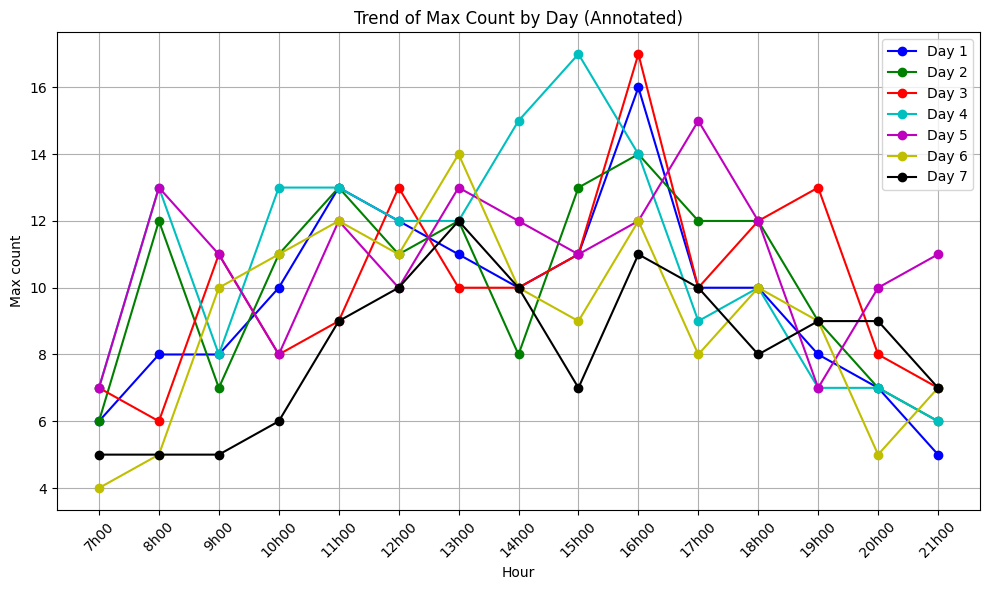

In [10]:
plt.figure(figsize=(10, 6))

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

for i, day in enumerate(detailed_table_annotations['Day'].unique()):
    df_day = detailed_table_annotations[detailed_table_annotations['Day'] == day]
    plt.plot(df_day['Hour'], df_day['Max_count'], marker='o', linestyle='-', color=colors[i], label=day)

plt.xlabel('Hour')
plt.ylabel('Max count')
plt.title('Trend of Max Count by Day (Annotated)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('trend_max_count_by_day_annotated.jpg', format='jpg', dpi=300)
plt.show()

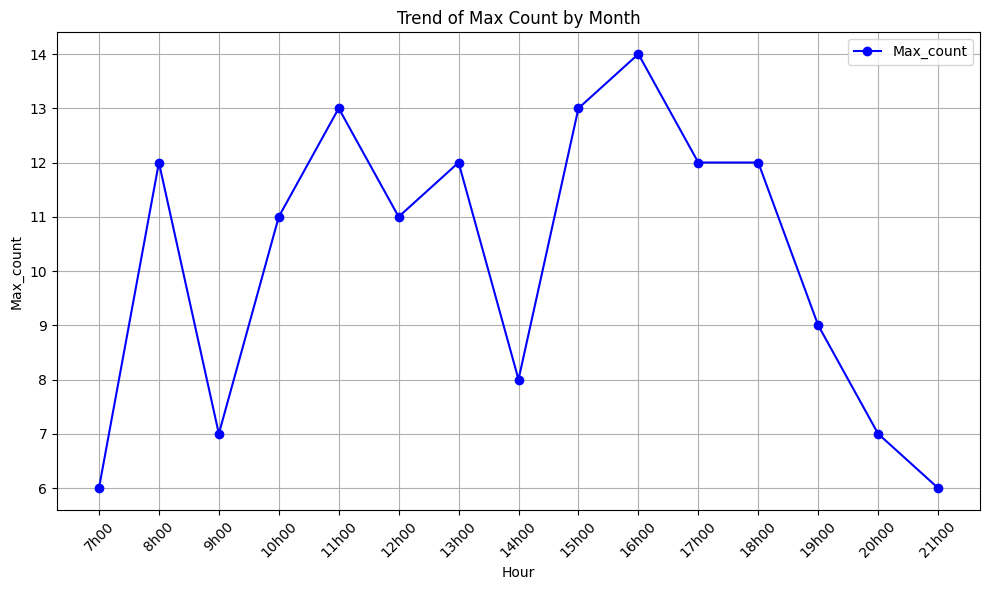

In [11]:
DAY = 2

df_day_i_annotations = detailed_table_annotations[detailed_table_annotations['Day'] == f'Day {DAY}']
plt.figure(figsize=(10, 6))
plt.plot(df_day_i_annotations['Hour'], df_day_i_annotations['Max_count'], marker='o', linestyle='-', color='b', label='Max_count')
plt.xlabel('Hour')
plt.ylabel('Max_count')
plt.title('Trend of Max Count by Month')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# **Section 03.** Filtered Predictions

### **Section 03.01.** General Table (Predictions)

In [14]:
label_path = '/content/drive/MyDrive/TIC-YOLO/Annotations_vs_Predictions/Filtered_Predictions'

label_files = glob.glob(label_path+ '/*')
label_files.sort()

class_counts = {0: 0, 1: 0, 2: 0, 3: 0}

for label_file in label_files:
    with open(label_file, 'r') as f:
        label_lines = f.readlines()
        for label_line in label_lines:
            label_line = label_line.strip()
            if not label_line:
                continue
            label, x_c, y_c, w, h = label_line.split(' ')
            label = int(float(label))
            if label in class_counts:
                class_counts[label] += 1

df_filtered_predictions = pd.DataFrame(list(class_counts.items()), columns=['Class', 'Count'])

print('%%% Counting Table %%%')
print(df_filtered_predictions)

print(f'Total number of detected vehicle: {sum(df_filtered_predictions["Count"])}')

%%% Counting Table %%%
   Class  Count
0      0   4929
1      1   1769
2      2    382
3      3     38
Total number of detected vehicle: 7118


In [13]:
# Count depending of the set (Train, test, or val)
# Define the path of filtered predictions (This was done in script "01_Model-Predictions-FilteredPredictions.ipynb")
label_path = '/content/drive/MyDrive/TIC-YOLO/Annotations_vs_Predictions/Filtered_Predictions'

# List all files stored in "Filtered_Predictions" folder
label_files = glob.glob(label_path+ '/*')
label_files.sort()

#label_files = [all_labels_k for all_labels_k in label_files if all_labels_k.split(os.path.sep)[-1][:10] == "filtered_7"]
label_files = [all_labels_k for all_labels_k in label_files if all_labels_k.split(os.path.sep)[-1][:10] != "filtered_6" and all_labels_k.split(os.path.sep)[-1][:10] != "filtered_7" ]

# Declare a dictionary (to count the number of vehicles in each class)
class_counts = {0: 0, 1: 0, 2: 0, 3: 0}


# Iterate through all the files stored in "Filtered_Predictions" folder
for label_file in label_files:
    with open(label_file, 'r') as f:
        label_lines = f.readlines()
        for label_line in label_lines:
            label_line = label_line.strip()
            if not label_line:
                continue
            label, x_c, y_c, w, h = label_line.split(' ')
            label = int(float(label))
            if label in class_counts:
                class_counts[label] += 1

# Convert the distionary into a data frame
df_filtered_predictions = pd.DataFrame(list(class_counts.items()), columns=['Class', 'Count'])

# Show the table created
print('%%% Counting Table %%%')
print(df_filtered_predictions)

print(f'Total number of detected vehicle: {sum(df_filtered_predictions["Count"])}')

%%% Counting Table %%%
   Class  Count
0      0   3716
1      1   1288
2      2    349
3      3     37
Total number of detected vehicle: 5390


### **Section 03.02.** Detailed Table (Predictions)

In [15]:
counts = np.array([], dtype=int)
aux = 0

for label_file in label_files:
    with open(label_file, 'r') as f:
        line_count = len(f.readlines())
        counts = np.append(counts, line_count)
    aux += 1
    if(aux == 11):
      max_hour = np.max(counts[-11:])
      mean_hour = np.mean(counts[-11:])
      counts = np.append(counts, [max_hour, mean_hour])
      aux = 0

matrix_counts = counts.reshape((105, 13))

col_names = [f"img{i}" for i in range(1,12)]
col_names.append("Max_count")
col_names.append("Mean_count")

detailed_table_predictions = pd.DataFrame(matrix_counts, columns=col_names)

days = [f"Day {i}" for i in range(1,8) for j in range(1,16)]
detailed_table_predictions['Day'] = days
hours = [f"{j}h00" for i in range(1,8) for j in range(7,22)]
detailed_table_predictions['Hour'] = hours
serie_ejex = [f"D{i} {j}h00" for i in range(1,8) for j in range(7,22)]
detailed_table_predictions['serie_ejex'] = serie_ejex
detailed_table_predictions = detailed_table_predictions[['Day','Hour','serie_ejex']+ col_names]
detailed_table_predictions

,Day,Hour,serie_ejex,img1,img2,img3,img4,img5,img6,img7,img8,img9,img10,img11,Max_count,Mean_count
0,Day 1,7h00,D1 7h00,2.0,3.0,2.0,6.0,3.0,3.0,4.0,0.0,2.0,5.0,4.0,6.0,3.090909
1,Day 1,8h00,D1 8h00,8.0,4.0,8.0,7.0,4.0,3.0,6.0,9.0,8.0,3.0,7.0,9.0,6.090909
2,Day 1,9h00,D1 9h00,4.0,4.0,4.0,6.0,5.0,4.0,5.0,3.0,9.0,6.0,8.0,9.0,5.272727
3,Day 1,10h00,D1 10h00,6.0,5.0,11.0,7.0,5.0,7.0,7.0,4.0,6.0,6.0,5.0,11.0,6.272727
4,Day 1,11h00,D1 11h00,8.0,5.0,4.0,5.0,11.0,10.0,10.0,5.0,10.0,7.0,6.0,11.0,7.363636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,Day 7,17h00,D7 17h00,6.0,4.0,8.0,8.0,5.0,4.0,5.0,5.0,7.0,8.0,3.0,8.0,5.727273
101,Day 7,18h00,D7 18h00,4.0,1.0,8.0,4.0,8.0,4.0,4.0,3.0,4.0,4.0,7.0,8.0,4.636364
102,Day 7,19h00,D7 19h00,4.0,9.0,7.0,11.0,8.0,8.0,7.0,7.0,8.0,6.0,4.0,11.0,7.181818
103,Day 7,20h00,D7 20h00,0.0,8.0,4.0,2.0,5.0,1.0,3.0,5.0,3.0,4.0,7.0,8.0,3.818182


### **Section 03.03.** Figures (Predictions)

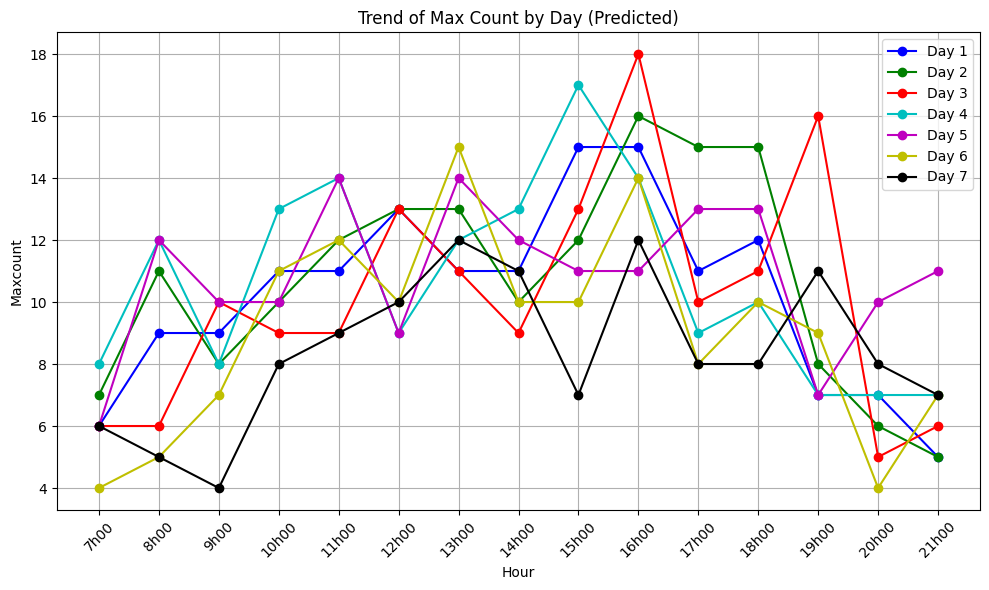

In [16]:
plt.figure(figsize=(10, 6))

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

for i, day in enumerate(detailed_table_predictions['Day'].unique()):
    df_day = detailed_table_predictions[detailed_table_predictions['Day'] == day]
    plt.plot(df_day['Hour'], df_day['Max_count'], marker='o', linestyle='-', color=colors[i], label=day)

plt.xlabel('Hour')
plt.ylabel('Maxcount')
plt.title('Trend of Max Count by Day (Predicted)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('trend_max_count_by_day_predicted.jpg', format='jpg', dpi=300)
plt.show()

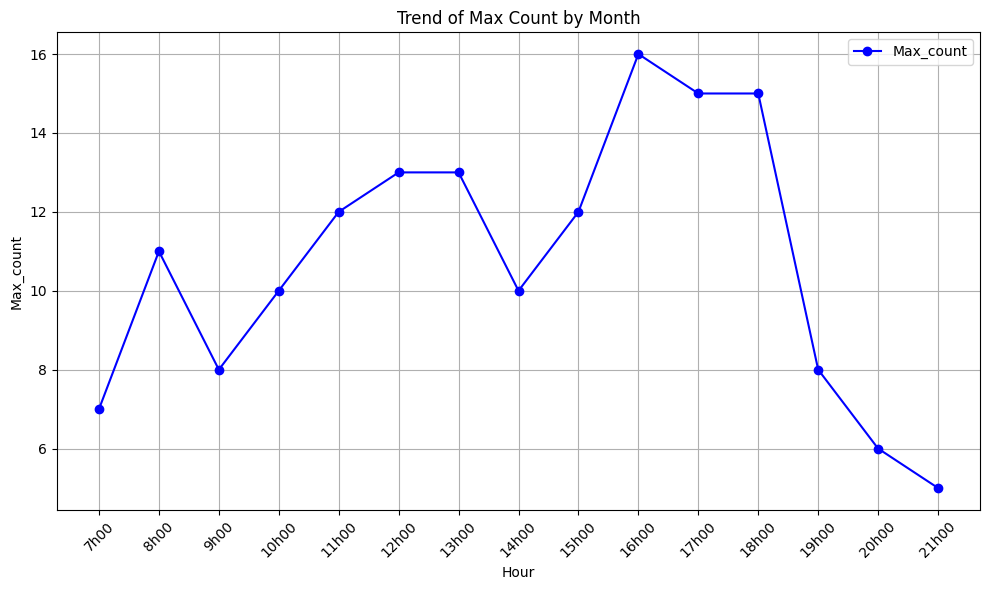

In [17]:
DAY = 2

df_day_i_predictions = detailed_table_predictions[detailed_table_predictions['Day'] == f'Day {DAY}']
plt.figure(figsize=(10, 6))
plt.plot(df_day_i_predictions['Hour'], df_day_i_predictions['Max_count'], marker='o', linestyle='-', color='b', label='Max_count')
plt.xlabel('Hour')
plt.ylabel('Max_count')
plt.title('Trend of Max Count by Month')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# **Section 04.** Comparison: Annotations vs Predictions

### **Section 04.01.** Comparative Table


In [18]:
# Set up the number of days you want to compare
DAY = 2
num_hours = 11 # Number of hours that I am interested to show in the table
num_rows = num_hours*2

rows = []

for i in range(num_rows):
    if i % 2 == 0:  # If even, take row from first DataFrame ("detailed_table_annotations")
        row = detailed_table_annotations[detailed_table_annotations['Day'] == f'Day {DAY}'].iloc[i // 2]
    else:  # If odd, take row from second DataFrame ("detailed_table_predictions")
        row = detailed_table_predictions[detailed_table_predictions['Day'] == f'Day {DAY}'].iloc[i // 2]
    rows.append(row)

# Create the new data frame
df_comparison = pd.DataFrame(rows)
id = ['Anotation','Prediction']
new_column =[id[j] for i in range(num_hours) for j in range(2) ]
df_comparison['Annot/Predict'] = new_column
df_comparison = df_comparison[['Day','Hour','Annot/Predict']+ col_names]
df_comparison

,Day,Hour,Annot/Predict,img1,img2,img3,img4,img5,img6,img7,img8,img9,img10,img11,Max_count,Mean_count
15,Day 2,7h00,Anotation,4.0,1.0,3.0,5.0,5.0,3.0,6.0,4.0,5.0,4.0,3.0,6.0,3.909091
15,Day 2,7h00,Prediction,6.0,2.0,3.0,4.0,6.0,3.0,7.0,4.0,5.0,3.0,3.0,7.0,4.181818
16,Day 2,8h00,Anotation,12.0,8.0,7.0,6.0,9.0,6.0,6.0,9.0,8.0,5.0,7.0,12.0,7.545455
16,Day 2,8h00,Prediction,11.0,11.0,8.0,6.0,10.0,6.0,5.0,9.0,9.0,5.0,6.0,11.0,7.818182
17,Day 2,9h00,Anotation,6.0,5.0,4.0,4.0,5.0,5.0,6.0,7.0,5.0,5.0,4.0,7.0,5.090909
17,Day 2,9h00,Prediction,7.0,5.0,5.0,4.0,8.0,5.0,5.0,7.0,5.0,5.0,4.0,8.0,5.454545
18,Day 2,10h00,Anotation,11.0,5.0,2.0,5.0,5.0,5.0,3.0,9.0,5.0,8.0,6.0,11.0,5.818182
18,Day 2,10h00,Prediction,10.0,6.0,3.0,6.0,8.0,4.0,3.0,8.0,5.0,8.0,6.0,10.0,6.090909
19,Day 2,11h00,Anotation,7.0,13.0,5.0,6.0,8.0,6.0,2.0,4.0,8.0,5.0,9.0,13.0,6.636364
19,Day 2,11h00,Prediction,7.0,12.0,6.0,6.0,10.0,6.0,2.0,3.0,9.0,6.0,9.0,12.0,6.909091


### **Section 04.02.** Comparative Figures

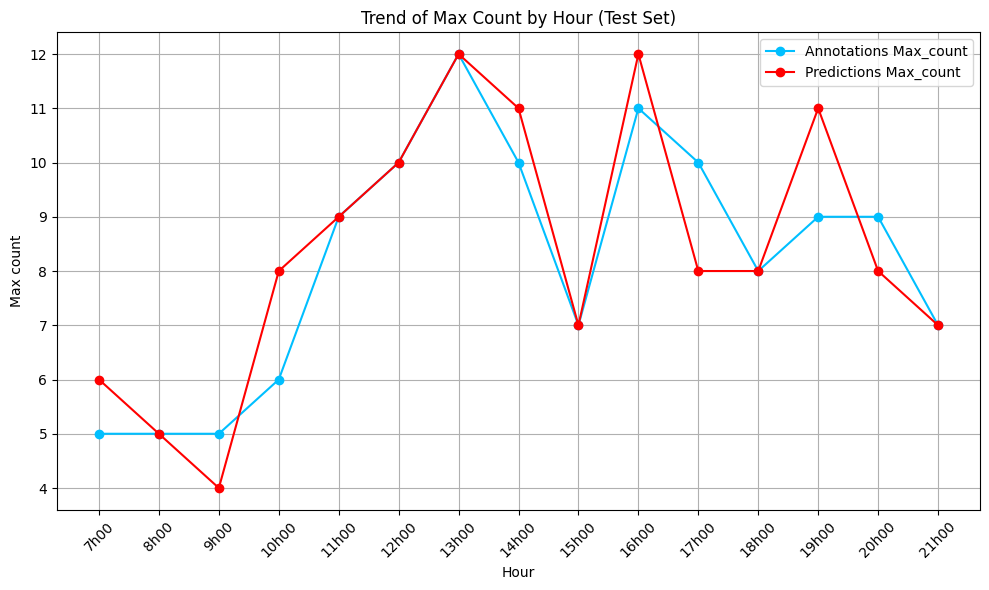

In [19]:
DAY = 7

df_day_i_annotations = detailed_table_annotations[detailed_table_annotations['Day'] == f'Day {DAY}']
df_day_i_predictions = detailed_table_predictions[detailed_table_annotations['Day'] == f'Day {DAY}']

plt.figure(figsize=(10, 6))

# Graph the annotations
plt.plot(df_day_i_annotations['Hour'], df_day_i_annotations['Max_count'], marker='o', linestyle='-', color='#00BFFF', label='Annotations Max_count')

# Graph the predictions
plt.plot(df_day_i_predictions['Hour'], df_day_i_predictions['Max_count'], marker='o', linestyle='-', color='r', label='Predictions Max_count')


plt.xlabel('Hour')
plt.ylabel('Max count')
plt.title('Trend of Max Count by Hour (Test Set)')


plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('trend_max_count_by_hour_test.jpg', format='jpg', dpi=300)
plt.show()



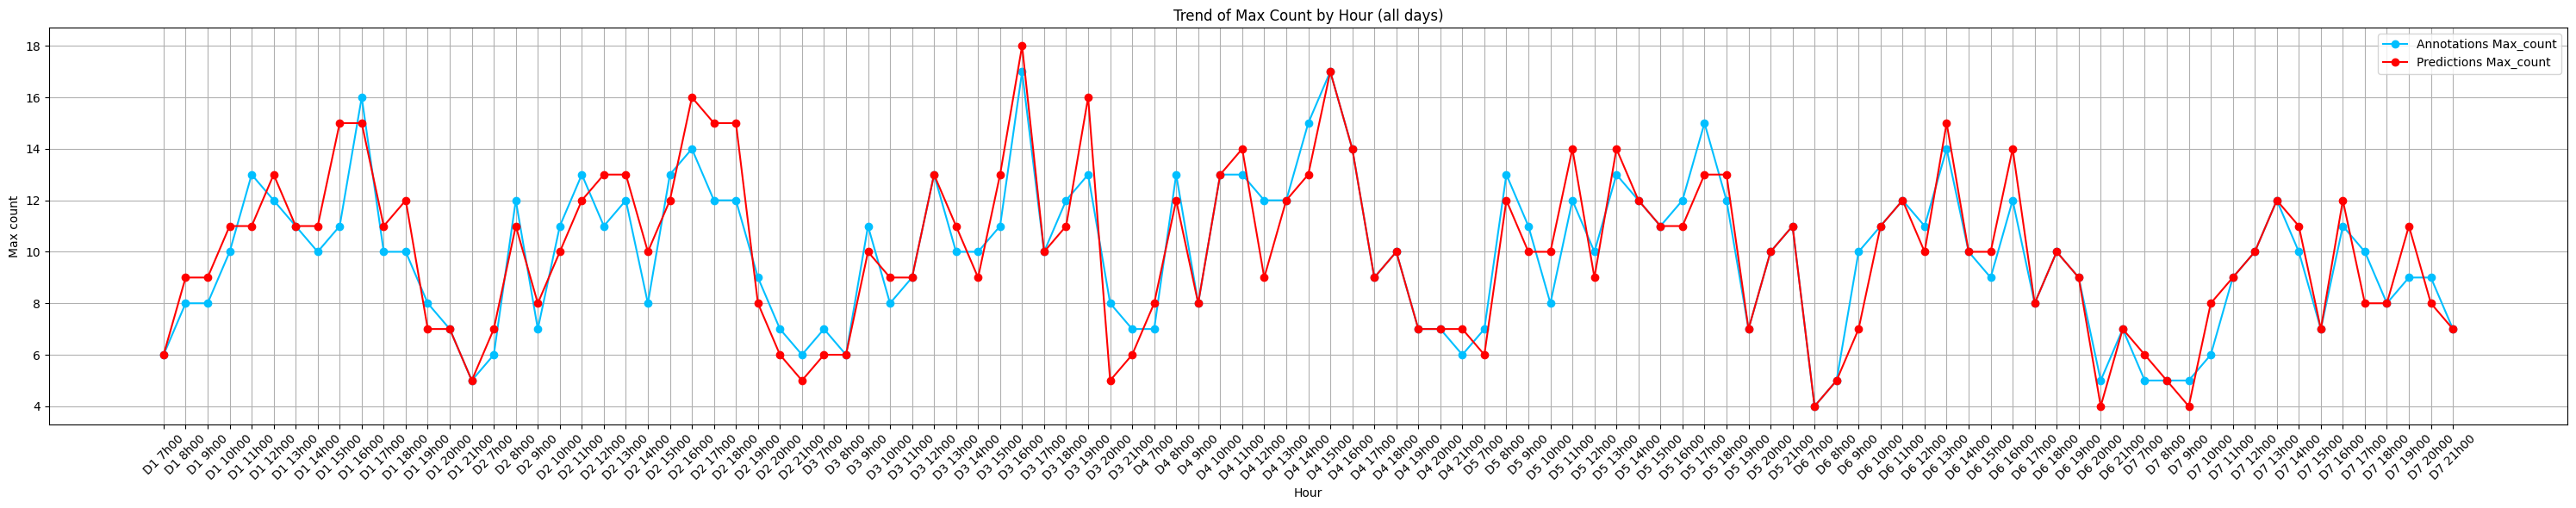

In [21]:
df_day_i_annotations = detailed_table_annotations
df_day_i_predictions = detailed_table_predictions
plt.figure(figsize=(30, 6))

# Graph the annotations
plt.plot(df_day_i_annotations['serie_ejex'], df_day_i_annotations['Max_count'], marker='o', linestyle='-', color='#00BFFF', label='Annotations Max_count')

# Graph the predictions
plt.plot(df_day_i_predictions['serie_ejex'], df_day_i_predictions['Max_count'], marker='o', linestyle='-', color='r', label='Predictions Max_count')


plt.xlabel('Hour')
plt.ylabel('Max count')
plt.title('Trend of Max Count by Hour (all days)')


plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('trend_max_count_by_hour.jpg', format='jpg', dpi=300)
plt.show()


In [35]:
# Desviacion estandar del flujo maximo (anotaciones vs predicciones)
from sklearn.metrics import mean_squared_error
mse = np.sqrt(mean_squared_error(np.array(detailed_table_annotations['Max_count']), np.array(detailed_table_predictions['Max_count'])))
print(f'En promedio, el modelo detecta {mse} mas autos o menos autos que los que en realidad existen en las imágenes de la base ColdwaterML.')

En promedio, el modelo detecta 1.245945806357946 mas autos o menos autos que los que en realidad existen en las imágenes de la base ColdwaterML.


<ipython-input-22-c408697d95ff>:30: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), label='Max Count')


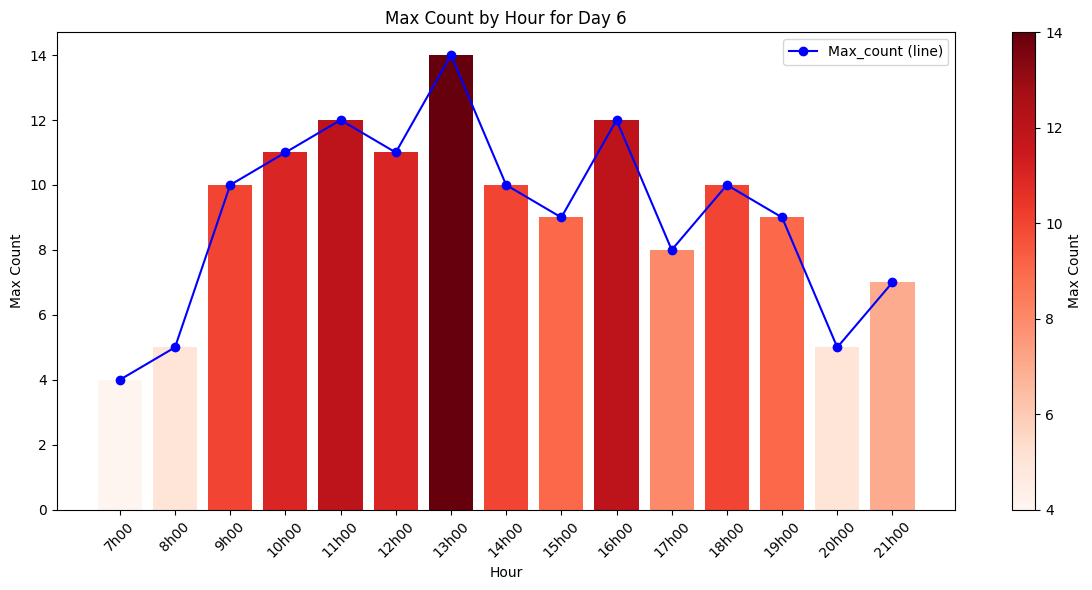

In [22]:
import seaborn as sns

DAY = 6

df_day_i_annotations = detailed_table_annotations[detailed_table_annotations['Day'] == f'Day {DAY}']

plt.figure(figsize=(12, 6))

max_counts = df_day_i_annotations['Max_count']
hours = df_day_i_annotations['Hour']

# Creat the colormap
norm = plt.Normalize(max_counts.min(), max_counts.max())
cmap = plt.get_cmap('Reds')

# Paint the bars according to their values
bar_colors = cmap(norm(max_counts))

# Plot the bars
plt.bar(hours, max_counts, color=bar_colors)#, label='Max_count (bars)')

# Graph the trend line
plt.plot(hours, max_counts, marker='o', linestyle='-', color='b', label='Max_count (line)')


plt.xlabel('Hour')
plt.ylabel('Max Count')
plt.title(f'Max Count by Hour for Day {DAY}')
plt.xticks(rotation=45)
plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), label='Max Count')
plt.legend()
plt.tight_layout()
plt.show()


# **Section 05.** Counting Vehicles

### **Section 05.01.** Flow of vehicles through the time (using annotations)

In [23]:
label_path = '/content/drive/MyDrive/TIC-YOLO/Annotations_vs_Predictions/Filtered_Annotations'


label_files =  glob.glob(label_path+ '/*')
label_files.sort()


counts = np.array([], dtype=int)
aux = 0

for label_file in label_files:
    with open(label_file, 'r') as f:
        line_count = len(f.readlines())
        counts = np.append(counts, line_count)
    aux += 1
    if(aux == 11):
      max_hour = np.max(counts[-11:])
      mean_hour = np.mean(counts[-11:])
      counts = np.append(counts, [max_hour, mean_hour])
      aux = 0

matrix_counts = counts.reshape((105, 13))

col_names = [f"img{i}" for i in range(1,12)]
col_names.append("Max_count")
col_names.append("Mean_count")

detailed_table_annotations = pd.DataFrame(matrix_counts, columns=col_names)

days = [f"Day {i}" for i in range(1,8) for j in range(1,16)]
detailed_table_annotations['Day'] = days
hours = [f"{j}h00" for i in range(1,8) for j in range(7,22)]
detailed_table_annotations['Hour'] = hours
serie_ejex = [f"D{i} {j}h00" for i in range(1,8) for j in range(7,22)]
detailed_table_annotations['serie_ejex'] = serie_ejex
detailed_table_annotations = detailed_table_annotations[['Day','Hour','serie_ejex']+ col_names]

detailed_table_annotations = detailed_table_annotations[['Day','Hour']+ col_names[:-1]]
columns_to_convert = detailed_table_annotations.columns[2:16]

detailed_table_annotations[columns_to_convert] = detailed_table_annotations[columns_to_convert].astype(int)

In [24]:
detailed_table_annotations

,Day,Hour,img1,img2,img3,img4,img5,img6,img7,img8,img9,img10,img11,Max_count
0,Day 1,7h00,2,3,2,6,3,3,4,0,2,4,3,6
1,Day 1,8h00,8,4,7,8,6,3,6,8,8,7,8,8
2,Day 1,9h00,4,6,4,6,5,3,5,3,8,5,8,8
3,Day 1,10h00,5,5,10,5,5,8,6,4,8,6,5,10
4,Day 1,11h00,7,5,4,6,10,9,13,6,9,9,5,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,Day 7,17h00,5,5,8,7,7,4,4,5,6,10,2,10
101,Day 7,18h00,4,1,7,4,8,4,4,2,5,4,6,8
102,Day 7,19h00,5,9,5,9,8,7,8,8,8,6,4,9
103,Day 7,20h00,1,9,5,2,5,1,3,4,3,4,5,9


In [25]:
# Convert to LaTeX table
latex_table = detailed_table_annotations.to_latex(index=False)
print(latex_table)

\begin{tabular}{llrrrrrrrrrrrr}
\toprule
Day & Hour & img1 & img2 & img3 & img4 & img5 & img6 & img7 & img8 & img9 & img10 & img11 & Max_count \\
\midrule
Day 1 & 7h00 & 2 & 3 & 2 & 6 & 3 & 3 & 4 & 0 & 2 & 4 & 3 & 6 \\
Day 1 & 8h00 & 8 & 4 & 7 & 8 & 6 & 3 & 6 & 8 & 8 & 7 & 8 & 8 \\
Day 1 & 9h00 & 4 & 6 & 4 & 6 & 5 & 3 & 5 & 3 & 8 & 5 & 8 & 8 \\
Day 1 & 10h00 & 5 & 5 & 10 & 5 & 5 & 8 & 6 & 4 & 8 & 6 & 5 & 10 \\
Day 1 & 11h00 & 7 & 5 & 4 & 6 & 10 & 9 & 13 & 6 & 9 & 9 & 5 & 13 \\
Day 1 & 12h00 & 8 & 9 & 6 & 11 & 8 & 11 & 11 & 12 & 5 & 9 & 9 & 12 \\
Day 1 & 13h00 & 8 & 8 & 8 & 8 & 11 & 8 & 6 & 6 & 8 & 10 & 9 & 11 \\
Day 1 & 14h00 & 6 & 7 & 7 & 10 & 9 & 9 & 7 & 8 & 5 & 7 & 4 & 10 \\
Day 1 & 15h00 & 8 & 10 & 9 & 8 & 11 & 6 & 9 & 11 & 7 & 6 & 9 & 11 \\
Day 1 & 16h00 & 11 & 16 & 7 & 10 & 9 & 8 & 7 & 7 & 10 & 10 & 10 & 16 \\
Day 1 & 17h00 & 6 & 7 & 6 & 10 & 9 & 10 & 6 & 1 & 5 & 9 & 9 & 10 \\
Day 1 & 18h00 & 10 & 6 & 8 & 5 & 9 & 6 & 6 & 3 & 6 & 7 & 10 & 10 \\
Day 1 & 19h00 & 6 & 7 & 1 & 3 & 3 & 

### **Section 05.02.** Flow of vehicles through the time (using predictions)

In [26]:
label_path = '/content/drive/MyDrive/TIC-YOLO/Annotations_vs_Predictions/Filtered_Predictions'


label_files =  glob.glob(label_path+ '/*')
label_files.sort()


counts = np.array([], dtype=int)
aux = 0

for label_file in label_files:
    with open(label_file, 'r') as f:
        line_count = len(f.readlines())
        counts = np.append(counts, line_count)
    aux += 1
    if(aux == 11):
      max_hour = np.max(counts[-11:])
      mean_hour = np.mean(counts[-11:])
      counts = np.append(counts, [max_hour, mean_hour])
      aux = 0

matrix_counts = counts.reshape((105, 13))

col_names = [f"img{i}" for i in range(1,12)]
col_names.append("Max_count")
col_names.append("Mean_count")

detailed_table_predictions = pd.DataFrame(matrix_counts, columns=col_names)

days = [f"Day {i}" for i in range(1,8) for j in range(1,16)]
detailed_table_predictions['Day'] = days
hours = [f"{j}h00" for i in range(1,8) for j in range(7,22)]
detailed_table_predictions['Hour'] = hours
serie_ejex = [f"D{i} {j}h00" for i in range(1,8) for j in range(7,22)]
detailed_table_predictions['serie_ejex'] = serie_ejex
detailed_table_predictions = detailed_table_predictions[['Day','Hour','serie_ejex']+ col_names]

detailed_table_predictions = detailed_table_predictions[['Day','Hour']+ col_names[:-1]]
columns_to_convert = detailed_table_predictions.columns[2:16]

detailed_table_predictions[columns_to_convert] = detailed_table_predictions[columns_to_convert].astype(int)

In [27]:
detailed_table_predictions

,Day,Hour,img1,img2,img3,img4,img5,img6,img7,img8,img9,img10,img11,Max_count
0,Day 1,7h00,2,3,2,6,3,3,4,0,2,5,4,6
1,Day 1,8h00,8,4,8,7,4,3,6,9,8,3,7,9
2,Day 1,9h00,4,4,4,6,5,4,5,3,9,6,8,9
3,Day 1,10h00,6,5,11,7,5,7,7,4,6,6,5,11
4,Day 1,11h00,8,5,4,5,11,10,10,5,10,7,6,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,Day 7,17h00,6,4,8,8,5,4,5,5,7,8,3,8
101,Day 7,18h00,4,1,8,4,8,4,4,3,4,4,7,8
102,Day 7,19h00,4,9,7,11,8,8,7,7,8,6,4,11
103,Day 7,20h00,0,8,4,2,5,1,3,5,3,4,7,8


In [28]:
# Convert to LaTeX table
latex_table = detailed_table_predictions.to_latex(index=False)
print(latex_table)

\begin{tabular}{llrrrrrrrrrrrr}
\toprule
Day & Hour & img1 & img2 & img3 & img4 & img5 & img6 & img7 & img8 & img9 & img10 & img11 & Max_count \\
\midrule
Day 1 & 7h00 & 2 & 3 & 2 & 6 & 3 & 3 & 4 & 0 & 2 & 5 & 4 & 6 \\
Day 1 & 8h00 & 8 & 4 & 8 & 7 & 4 & 3 & 6 & 9 & 8 & 3 & 7 & 9 \\
Day 1 & 9h00 & 4 & 4 & 4 & 6 & 5 & 4 & 5 & 3 & 9 & 6 & 8 & 9 \\
Day 1 & 10h00 & 6 & 5 & 11 & 7 & 5 & 7 & 7 & 4 & 6 & 6 & 5 & 11 \\
Day 1 & 11h00 & 8 & 5 & 4 & 5 & 11 & 10 & 10 & 5 & 10 & 7 & 6 & 11 \\
Day 1 & 12h00 & 8 & 10 & 6 & 13 & 8 & 11 & 9 & 11 & 8 & 9 & 8 & 13 \\
Day 1 & 13h00 & 9 & 6 & 7 & 7 & 9 & 8 & 6 & 7 & 8 & 10 & 11 & 11 \\
Day 1 & 14h00 & 6 & 7 & 5 & 11 & 8 & 7 & 8 & 8 & 5 & 6 & 4 & 11 \\
Day 1 & 15h00 & 8 & 10 & 8 & 9 & 11 & 8 & 9 & 15 & 8 & 3 & 9 & 15 \\
Day 1 & 16h00 & 12 & 15 & 6 & 12 & 9 & 9 & 7 & 8 & 9 & 10 & 10 & 15 \\
Day 1 & 17h00 & 6 & 7 & 6 & 9 & 10 & 11 & 7 & 1 & 5 & 9 & 9 & 11 \\
Day 1 & 18h00 & 12 & 3 & 8 & 6 & 8 & 6 & 5 & 3 & 4 & 7 & 12 & 12 \\
Day 1 & 19h00 & 7 & 6 & 1 & 3 & 3 &

### **Section 05.03.** Comparative table by an specific day

In [29]:
rows = []

DAY = 6
num_hours = 15
num_rows = num_hours*2

for i in range(num_rows):
    if i % 2 == 0:
        row = detailed_table_annotations[detailed_table_annotations['Day'] == f'Day {DAY}'].iloc[i // 2]
    else:
        row = detailed_table_predictions[detailed_table_predictions['Day'] == f'Day {DAY}'].iloc[i // 2]
    rows.append(row)


df_comparison = pd.DataFrame(rows)

id = ['A','P']
new_column =[id[j] for i in range(num_hours) for j in range(2) ]
df_comparison['Type'] = new_column
df_comparison = df_comparison[['Hour','Type']+ col_names[:-1]]
df_comparison
columns_to_convert = df_comparison.columns[2:15]

df_comparison[columns_to_convert] = df_comparison[columns_to_convert].astype(int)


<ipython-input-29-8a7b850b54eb>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comparison[columns_to_convert] = df_comparison[columns_to_convert].astype(int)


In [31]:
df_comparison

,Hour,Type,img1,img2,img3,img4,img5,img6,img7,img8,img9,img10,img11,Max_count
75,7h00,A,0,1,1,1,1,4,2,3,1,3,2,4
75,7h00,P,0,1,0,1,1,4,2,3,1,0,0,4
76,8h00,A,2,2,5,2,4,1,2,1,2,2,2,5
76,8h00,P,2,2,5,2,4,1,3,2,3,2,2,5
77,9h00,A,5,6,7,3,5,2,4,9,6,10,8,10
77,9h00,P,3,4,6,3,4,2,3,7,5,6,7,7
78,10h00,A,7,11,8,8,4,6,6,2,11,4,5,11
78,10h00,P,5,7,7,8,4,6,7,3,11,5,5,11
79,11h00,A,5,9,5,9,7,9,6,6,12,7,7,12
79,11h00,P,5,11,6,12,8,12,3,5,12,8,8,12


In [30]:
# Convert to LaTeX table
latex_table = df_comparison.to_latex(index=False)
print(latex_table)

\begin{tabular}{llrrrrrrrrrrrr}
\toprule
Hour & Type & img1 & img2 & img3 & img4 & img5 & img6 & img7 & img8 & img9 & img10 & img11 & Max_count \\
\midrule
7h00 & A & 0 & 1 & 1 & 1 & 1 & 4 & 2 & 3 & 1 & 3 & 2 & 4 \\
7h00 & P & 0 & 1 & 0 & 1 & 1 & 4 & 2 & 3 & 1 & 0 & 0 & 4 \\
8h00 & A & 2 & 2 & 5 & 2 & 4 & 1 & 2 & 1 & 2 & 2 & 2 & 5 \\
8h00 & P & 2 & 2 & 5 & 2 & 4 & 1 & 3 & 2 & 3 & 2 & 2 & 5 \\
9h00 & A & 5 & 6 & 7 & 3 & 5 & 2 & 4 & 9 & 6 & 10 & 8 & 10 \\
9h00 & P & 3 & 4 & 6 & 3 & 4 & 2 & 3 & 7 & 5 & 6 & 7 & 7 \\
10h00 & A & 7 & 11 & 8 & 8 & 4 & 6 & 6 & 2 & 11 & 4 & 5 & 11 \\
10h00 & P & 5 & 7 & 7 & 8 & 4 & 6 & 7 & 3 & 11 & 5 & 5 & 11 \\
11h00 & A & 5 & 9 & 5 & 9 & 7 & 9 & 6 & 6 & 12 & 7 & 7 & 12 \\
11h00 & P & 5 & 11 & 6 & 12 & 8 & 12 & 3 & 5 & 12 & 8 & 8 & 12 \\
12h00 & A & 4 & 6 & 8 & 8 & 7 & 8 & 7 & 10 & 9 & 11 & 6 & 11 \\
12h00 & P & 3 & 5 & 7 & 7 & 10 & 8 & 6 & 9 & 7 & 10 & 4 & 10 \\
13h00 & A & 7 & 8 & 4 & 9 & 8 & 9 & 8 & 8 & 3 & 14 & 7 & 14 \\
13h00 & P & 7 & 8 & 5 & 7 & 7 & 10 